# Лабораторная работа по классификации MNIST с использованием нескольких алгоритмов машинного обучения 

**Цель работы**

Целью данной лабораторной работы является изучение нескольких алгоритмов машинного обучения для классификации изображений рукописных цифр из набора данных MNIST.

**Задачи работы**

* Изучить набор данных MNIST и его структуру
* Изучить и реализовать **несколько** алгоритмов машинного обучения для классификации MNIST
* Обучить модели на наборе данных MNIST
* Оценить качество работы моделей и сравнить результаты
* Предложить улучшения и оптимизации для моделей

**Набор данных MNIST**

Набор данных MNIST является стандартным набором данных для задач распознавания образов. Он состоит из 70 000 изображений рукописных цифр от 0 до 9, каждое изображение имеет размер 28x28 пикселей. 

# Импорт библиотек

Для работы с данными и моделями нам понадобятся следующие библиотеки: numpy, pandas, matplotlib, scikit-learn.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Загрузка и нормализация данных (Например, используйте keras.datasets - mnist или fetch_openml('mnist_784') для загрузки набора данных mnist)

In [ ]:
# Загрузка данных
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784')

# Создаем датафрейм из данных MNIST
X = pd.DataFrame(mnist.data)
y = pd.Series(mnist.target)

# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Визуализация данных

Text(0.5, 1.0, 'Label: 6')

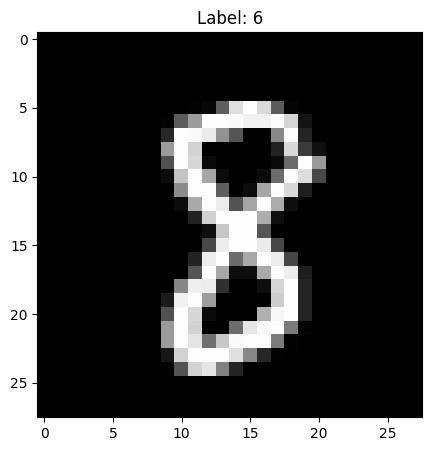

In [ ]:
# Отображение случайного изображения из обучающего набора данных
plt.figure(figsize=(5,5))
index = np.random.choice(X_train.shape[0])
plt.imshow(X_train.iloc[index].to_numpy().reshape(28,28), cmap='gray')
plt.title('Label: {}'.format(y_train[index]))

Реализация и обучение моделей

In [ ]:
## Реализация и обучение моделей

#метод k-ближайших соседей

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) #обучим модель на тренировочных данных

#дерево принятия решений

from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion="entropy", max_depth=100)
dtc.fit(X_train, y_train) #обучим модель на тренировочных данных

#алгоритм случайного леса

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train) #обучим модель на тренировочных данных

#SVM

from sklearn.svm import SVC

svc=SVC(C=1.5)
svc.fit(X_train,y_train) #обучим модель на тренировочных данных


SVC()

Оценка качества моделей

In [ ]:
##Оценка качества моделей

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

#метод k-ближайших соседей

y_pred=neigh.predict(X_test)
print("knn method")

print(f"F1 {f1_score(y_test, y_pred, average='micro')}")

#дерево принятия решений

y_pred=dtc.predict(X_test)
print("decision tree method")

print(f"F1 {f1_score(y_test, y_pred, average='micro')}")

#алгоритм случайного леса

y_pred=rfc.predict(X_test)

print("random forest")

print(f"F1 {f1_score(y_test, y_pred, average='micro')}")


#SVM

y_pred=svc.predict(X_test)
print("SVM")

print(f"F1 {f1_score(y_test, y_pred, average='micro')}")





knn method
F1 0.9712857142857143
decision tree method
F1 0.8815714285714286
random forest
F1 0.9667857142857142
SVM
F1 0.9764285714285714


Сравнение результатов

In [ ]:
##Сравнение результатов
Согласно оценке F1 наилучшие результаты наблюдаются у метода опорных векторов, метода ближайших соседей и метода случайного леса. 
Наихудшие результаты из рассмотренных методов наблюдаются у алгоритма "дерево принятия решений"

Выводы

In [ ]:
## Выводы
В ходе практической работы были изучены и реализованы следующие алгоритмы машинного обучения: метод ближайших соседей,
дерево принятия решений, алгоритм случайного леса, метод опорных векторов. Данные модели были обучены на данных из набора MNIST. 
Проведена оценка моделей, в ходе которой выявлено, что наилучшие результаты наблюдаются у метода опорных векторов, а наихудшие у дерева принятия решений. 
При этом метод опорных векторов значительно уступает в скорости обучения другим методам.
Для улучшения показателей качества моделей можно использовать ансамблевые методы, но при этом увеличивается время обучения моделей.

## Ответы на вопросы.
1. Что такое набор данных MNIST и для чего он используется в машинном обучении?
  
  Набор данных MNIST является стандартным набором данных для задач распознавания образов. Он состоит из 70 000 изображений рукописных цифр от 0 до 9, каждое изображение имеет размер 28x28 пикселей.

2. Какие алгоритмы машинного обучения вы использовали для классификации данных MNIST и как они работают?

 Метод k-ближайших соседей. Этот метод работает с помощью поиска кратчайшей дистанции между тестируемым объектом и ближайшими к нему классифицированным объектами из обучающего набора. Классифицируемый объект будет относится к тому классу, к которому принадлежит ближайший объект набора.
		
    Дерево принятия решений. Цель состоит в том, чтобы создать модель, которая предсказывает значение целевой переменной, изучая простые правила принятия решений, выведенные из характеристик данных. 
    
    Алгоритм случайного леса. Случайный лес сочетает сотни или тысячи деревьев принятия решений, обучая каждое на отдельной выборке данных, разделяя узлы в каждом дереве с использованием ограниченного набора параметров. Итоговый прогноз делается путём усреднения прогнозов от всех деревьев. 	
    
    Метод опорных векторов. Основной задачей алгоритма является найти наиболее правильную линию, или гиперплоскость разделяющую данные классы. Текст, выделенный полужирным шрифтом 

	
3. Какие параметры модели вы настраивали для улучшения ее производительности, и как они влияют на результаты моделирования? 

  Для метода ближайших соседей использовался параметр количества соседей для оценки. При увеличении данного параметра наблюдаются небольшие потери точности.

  Для метода дерева принятия решений задавался параметр максимальной глубины дерева, чтобы избежать переобучения модели.

  Для алгоритма случайного леса задавался параметр количества деревьев. При увеличении параметра наблюдается повышение качества модели, при этом может возникать переобучение модели. 

  Для метода опорных векторов параметр С помогает регулировать  “гладкость” и точностью классификации объектов обучающей выборки. Чем больше значение С, тем  выше точность классификации.

4. Как вы оценивали производительность своих моделей и почему выбрали те или иные метрики оценки? 

  При оценивании использовалась метрика F1, так как она учитывает точность и полноту модели.
  
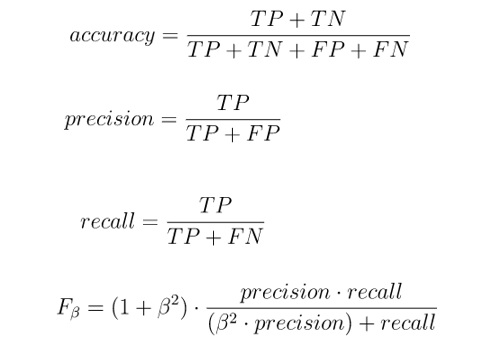
5. Как вы можете улучшить производительность ваших моделей и какие проблемы могут возникнуть при этом?

  Для улучшения показателей качества моделей можно использовать ансамблевые методы, большее количество данных, но при этом может возникнуть явление переобучения модели и увеличится время обучения моделей. 
